In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
!pip install koreanize-matplotlib

## 할로윈 기간 패션/의류, 잡화 물류량 변화
- 중복 변수 처리 후
- 날짜와 패션, 의류 컬럼 추출

### 데이터 불러오기

In [4]:
import pandas as pd
SEND_DATA_PATH='/content/drive/MyDrive/DeliverEase/SEND/'
send_21 = pd.read_csv(SEND_DATA_PATH+'21_10.csv', encoding='cp949')
send_21.head()

,DL_YMD,SEND_CTPV_NM,SEND_CTPV_CD,SEND_CTGG_NM,SEND_CTGG_CD,REC_CTPV_NM,REC_CTPV_CD,E_C_01,E_C_02,E_C_03,E_C_04,E_C_05,E_C_06,E_C_07,E_C_08,E_C_09,E_C_10,E_C_11
0,20211018,서울특별시,11.0,서초구,11650.0,서울특별시,11.0,425.0,2533.0,1152.0,893.0,1987.0,280.0,2715.0,194.0,2511.0,978.0,874.0
1,20211018,서울특별시,11.0,서초구,11650.0,부산광역시,26.0,87.0,502.0,288.0,213.0,537.0,70.0,729.0,39.0,519.0,259.0,222.0
2,20211018,서울특별시,11.0,서초구,11650.0,대구광역시,27.0,67.0,342.0,169.0,145.0,329.0,38.0,455.0,47.0,363.0,196.0,163.0
3,20211018,서울특별시,11.0,서초구,11650.0,인천광역시,28.0,93.0,467.0,198.0,218.0,457.0,51.0,718.0,49.0,555.0,236.0,185.0
4,20211018,서울특별시,11.0,서초구,11650.0,광주광역시,29.0,32.0,213.0,120.0,88.0,249.0,32.0,358.0,24.0,270.0,125.0,96.0


In [5]:
REC_DATA_PATH='/content/drive/MyDrive/DeliverEase/REC/'
rec_21=pd.read_csv(REC_DATA_PATH+'21_10.csv', encoding='cp949')
REC_SEND_DATA_PATH='/content/drive/MyDrive/DeliverEase/REC_SEND/'
rec_send_21=pd.read_csv(REC_SEND_DATA_PATH+'21_10.csv', encoding='cp949')

In [6]:
rec_send_21

,DL_YMD,SEND_CTPV_NM,SEND_CTPV_CD,SEND_CTGG_NM,SEND_CTGG_CD,REC_CTPV_NM,REC_CTPV_CD,REC_CTGG_NM,REC_CTGG_CD,E_C_01,E_C_02,E_C_03,E_C_04,E_C_05,E_C_06,E_C_07,E_C_08,E_C_09,E_C_10,E_C_11
0,20211018,서울특별시,11.0,서초구,11650.0,서울특별시,11.0,종로구,11110.0,4.0,64.0,31.0,18.0,18.0,5.0,34.0,0.0,54.0,10.0,20.0
1,20211018,서울특별시,11.0,서초구,11650.0,서울특별시,11.0,중구,11140.0,9.0,63.0,20.0,17.0,49.0,8.0,62.0,5.0,61.0,22.0,14.0
2,20211018,서울특별시,11.0,서초구,11650.0,서울특별시,11.0,용산구,11170.0,10.0,79.0,35.0,38.0,71.0,11.0,77.0,3.0,93.0,32.0,25.0
3,20211018,서울특별시,11.0,서초구,11650.0,서울특별시,11.0,성동구,11200.0,11.0,117.0,51.0,22.0,72.0,9.0,77.0,11.0,144.0,64.0,30.0
4,20211018,서울특별시,11.0,서초구,11650.0,서울특별시,11.0,광진구,11215.0,15.0,82.0,21.0,36.0,73.0,9.0,92.0,4.0,83.0,18.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17292,20211009,서울특별시,11.0,성북구,11290.0,서울특별시,11.0,관악구,11620.0,0.0,9.0,14.0,0.0,0.0,4.0,14.0,0.0,4.0,16.0,6.0
17293,20211009,서울특별시,11.0,성북구,11290.0,서울특별시,11.0,서초구,11650.0,0.0,19.0,0.0,8.0,7.0,3.0,20.0,5.0,14.0,18.0,14.0
17294,20211009,서울특별시,11.0,성북구,11290.0,서울특별시,11.0,강남구,11680.0,3.0,35.0,4.0,5.0,16.0,12.0,19.0,5.0,21.0,29.0,18.0
17295,20211009,서울특별시,11.0,성북구,11290.0,서울특별시,11.0,송파구,11710.0,5.0,30.0,3.0,0.0,20.0,10.0,19.0,10.0,14.0,26.0,20.0


In [7]:
import pandas as pd
SEND_DATA_PATH='/content/drive/MyDrive/DeliverEase/SEND/'
send_22 = pd.read_csv(SEND_DATA_PATH+'22_10.csv', encoding='cp949')
send_22.head()

,DL_YMD,SEND_CTPV_NM,SEND_CTPV_CD,SEND_CTGG_NM,SEND_CTGG_CD,REC_CTPV_NM,REC_CTPV_CD,E_C_01,E_C_02,E_C_03,E_C_04,E_C_05,E_C_06,E_C_07,E_C_08,E_C_09,E_C_10,E_C_11
0,20221006,서울특별시,11.0,종로구,11110.0,서울특별시,11.0,196.0,1177.0,357.0,361.0,823.0,100.0,537.0,105.0,3083.0,1110.0,474.0
1,20221006,서울특별시,11.0,종로구,11110.0,부산광역시,26.0,49.0,228.0,67.0,86.0,199.0,22.0,172.0,38.0,849.0,293.0,123.0
2,20221006,서울특별시,11.0,종로구,11110.0,대구광역시,27.0,28.0,181.0,54.0,60.0,144.0,11.0,94.0,61.0,632.0,164.0,57.0
3,20221006,서울특별시,11.0,종로구,11110.0,인천광역시,28.0,42.0,282.0,80.0,89.0,204.0,18.0,127.0,43.0,834.0,257.0,72.0
4,20221006,서울특별시,11.0,종로구,11110.0,광주광역시,29.0,24.0,92.0,33.0,42.0,78.0,6.0,57.0,25.0,484.0,134.0,52.0


In [8]:
REC_DATA_PATH='/content/drive/MyDrive/DeliverEase/REC/'
rec_22=pd.read_csv(REC_DATA_PATH+'22_10.csv', encoding='cp949')
REC_SEND_DATA_PATH='/content/drive/MyDrive/DeliverEase/REC_SEND/'
rec_send_22=pd.read_csv(REC_SEND_DATA_PATH+'22_10.csv', encoding='cp949')

### 전처리

In [9]:
df_send_21=send_21[['DL_YMD','SEND_CTPV_NM','REC_CTPV_NM','E_C_09', 'E_C_10']]
df_rec_21=rec_21[['DL_YMD','SEND_CTPV_NM','REC_CTPV_NM','E_C_09', 'E_C_10']]
df_rec_send_21=rec_send_21[['DL_YMD','SEND_CTPV_NM','REC_CTPV_NM','E_C_09', 'E_C_10']]

df_send_22=send_22[['DL_YMD','SEND_CTPV_NM','REC_CTPV_NM','E_C_09', 'E_C_10']]
df_rec_22=rec_22[['DL_YMD','SEND_CTPV_NM','REC_CTPV_NM','E_C_09', 'E_C_10']]
df_rec_send_22=rec_send_22[['DL_YMD','SEND_CTPV_NM','REC_CTPV_NM','E_C_09', 'E_C_10']]

In [10]:
df_rec_22.value_counts()

DL_YMD    SEND_CTPV_NM  REC_CTPV_NM  E_C_09  E_C_10
20221016  경상남도          서울특별시        0.0     0.0       25
20221023  대구광역시         서울특별시        0.0     0.0       25
20221016  전라남도          서울특별시        0.0     0.0       25
20221010  전라남도          서울특별시        0.0     0.0       25
20221023  충청북도          서울특별시        0.0     0.0       25
                                                       ..
20221012  전라남도          서울특별시        13.0    11.0       1
                                     17.0    7.0        1
                                     20.0    10.0       1
                                     23.0    9.0        1
20221031  충청북도          서울특별시        267.0   48.0       1
Length: 10855, dtype: int64

In [11]:
df_send_21=df_send_21[df_send_21['REC_CTPV_NM'] != '서울특별시']
df_rec_21=df_rec_21[df_rec_21['SEND_CTPV_NM'] != '서울특별시']
df_send_22=df_send_22[df_send_22['REC_CTPV_NM'] != '서울특별시']
df_rec_22=df_rec_22[df_rec_22['SEND_CTPV_NM'] != '서울특별시']
df_rec_22.value_counts()

DL_YMD    SEND_CTPV_NM  REC_CTPV_NM  E_C_09  E_C_10
20221003  강원도           서울특별시        0.0     0.0       25
20221023  대구광역시         서울특별시        0.0     0.0       25
20221030  강원도           서울특별시        0.0     0.0       25
20221003  광주광역시         서울특별시        0.0     0.0       25
20221023  전라남도          서울특별시        0.0     0.0       25
                                                       ..
20221012  전라북도          서울특별시        222.0   41.0       1
                                     235.0   18.0       1
                                     237.0   9.0        1
                                             19.0       1
20221031  충청북도          서울특별시        267.0   48.0       1
Length: 10082, dtype: int64

In [29]:
df_21 = pd.concat([df_send_21, df_rec_21, df_rec_send_21])
df_22 = pd.concat([df_send_22, df_rec_22, df_rec_send_22])

df_21.rename(columns={'DL_YMD':'날짜','SEND_CTPV_NM':'발송지','REC_CTPV_NM':'수령지','E_C_09':'패션/의류', 'E_C_10':'패션/잡화'}, inplace=True)
df_22.rename(columns={'DL_YMD':'날짜','SEND_CTPV_NM':'발송지','REC_CTPV_NM':'수령지','E_C_09':'패션/의류', 'E_C_10':'패션/잡화'}, inplace=True)

In [13]:
df_21

,날짜,발송지,수령지,패션/의류,패션/잡화
1,20211018,서울특별시,부산광역시,519.0,259.0
2,20211018,서울특별시,대구광역시,363.0,196.0
3,20211018,서울특별시,인천광역시,555.0,236.0
4,20211018,서울특별시,광주광역시,270.0,125.0
5,20211018,서울특별시,대전광역시,247.0,146.0
...,...,...,...,...,...
17292,20211009,서울특별시,서울특별시,4.0,16.0
17293,20211009,서울특별시,서울특별시,14.0,18.0
17294,20211009,서울특별시,서울특별시,21.0,29.0
17295,20211009,서울특별시,서울특별시,14.0,26.0


### 데이터 시각화
- 10월 18 ~ 31일까지의 패션 잡화 물량과 4 ~ 17일까지의 것을 비교

In [32]:
not_hol_21 = df_21[(20211003 < df_21['날짜']) & (df_21['날짜'] < 20211018)].copy()
hol_21 = df_21[(20211018 <= df_21['날짜']) & (df_21['날짜'] <= 20211031)].copy()
not_hol_22 = df_22[(20221003 < df_22['날짜']) & (df_22['날짜'] < 20221018)].copy()
hol_22 = df_22[(20221018 <= df_22['날짜']) & (df_22['날짜'] <= 20221031)].copy()

In [33]:
hol_22.head()

,날짜,발송지,수령지,패션/의류,패션/잡화
120,20221027,서울특별시,부산광역시,208.0,144.0
121,20221027,서울특별시,대구광역시,142.0,89.0
122,20221027,서울특별시,인천광역시,186.0,146.0
123,20221027,서울특별시,광주광역시,88.0,76.0
124,20221027,서울특별시,대전광역시,73.0,69.0


<ipython-input-39-7288097c2dac>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


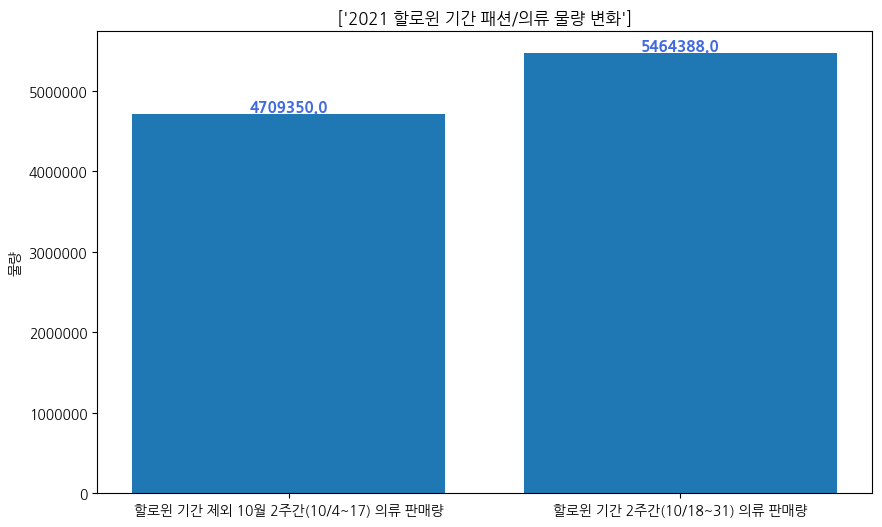

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

clothes_bf_21=not_hol_21['패션/의류'].sum()
stuff_bf_21=not_hol_21['패션/잡화'].sum()
clothes_af_21=hol_21['패션/의류'].sum()
stuff_af_21=hol_21['패션/잡화'].sum()

plt.figure(figsize=(10,6))
plt.bar(['할로윈 기간 제외 10월 2주간(10/4~17) 의류 판매량', '할로윈 기간 2주간(10/18~31) 의류 판매량'], [clothes_bf_21, clothes_af_21])
plt.title(['2021 할로윈 기간 패션/의류 물량 변화'])

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

x = np.arange(2)
year = ['할로윈 기간 이전', '할로윈 기간 이전'] # x축 표시
value = [clothes_bf_21, clothes_af_21]

for i, v in enumerate(x):
    plt.text(v, value[i], value[i],
             fontsize = 11,
             fontweight = 'bold',
             color = 'royalblue',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.ylabel('물량')
plt.show()

<ipython-input-35-656a4b95d3cd>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


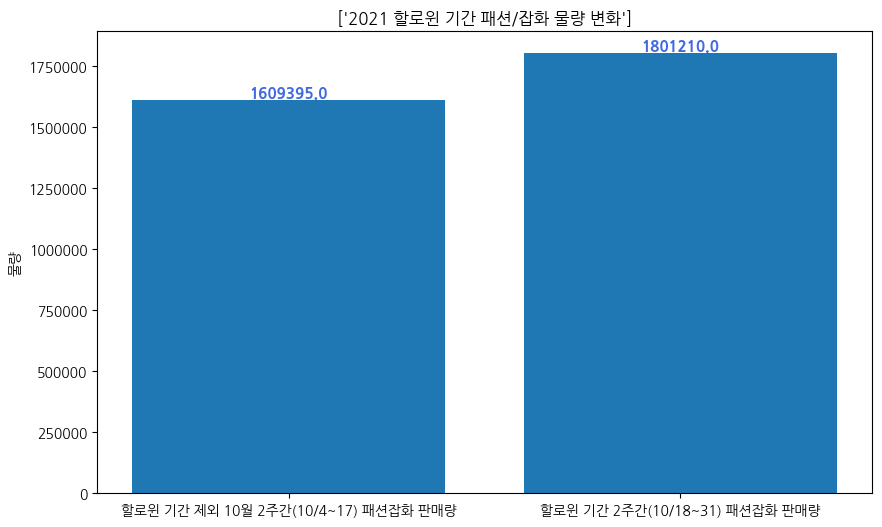

In [35]:
plt.figure(figsize=(10,6))
plt.bar(['할로윈 기간 제외 10월 2주간(10/4~17) 패션잡화 판매량', '할로윈 기간 2주간(10/18~31) 패션잡화 판매량'], [stuff_bf_21, stuff_af_21])
plt.title(['2021 할로윈 기간 패션/잡화 물량 변화'])

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

x = np.arange(2)
year = ['할로윈 기간 이전', '할로윈 기간 이전'] # x축 표시
value = [stuff_bf_21, stuff_af_21]

for i, v in enumerate(x):
    plt.text(v, value[i], value[i],
             fontsize = 11,
             fontweight = 'bold',
             color = 'royalblue',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.ylabel('물량')
plt.show()

<ipython-input-40-7a888e9f182d>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


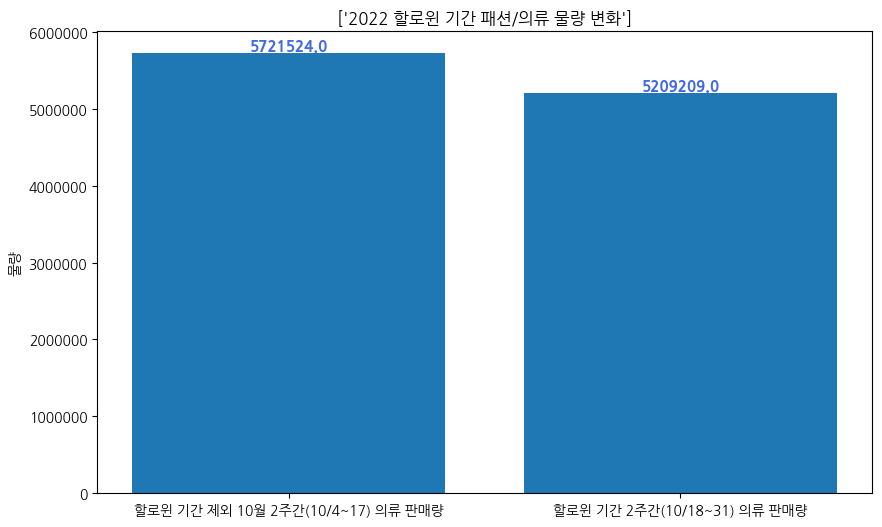

In [40]:
clothes_bf_22=not_hol_22['패션/의류'].sum()
stuff_bf_22=not_hol_22['패션/잡화'].sum()
clothes_af_22=hol_22['패션/의류'].sum()
stuff_af_22=hol_22['패션/잡화'].sum()

plt.figure(figsize=(10,6))
plt.bar(['할로윈 기간 제외 10월 2주간(10/4~17) 의류 판매량', '할로윈 기간 2주간(10/18~31) 의류 판매량'], [clothes_bf_22, clothes_af_22])
plt.title(['2022 할로윈 기간 패션/의류 물량 변화'])

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

x = np.arange(2)
year = ['할로윈 기간 이전', '할로윈 기간 이전'] # x축 표시
value = [clothes_bf_22, clothes_af_22]

for i, v in enumerate(x):
    plt.text(v, value[i], value[i],
             fontsize = 11,
             fontweight = 'bold',
             color = 'royalblue',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.ylabel('물량')
plt.show()

<ipython-input-38-f09d0fa3b21d>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


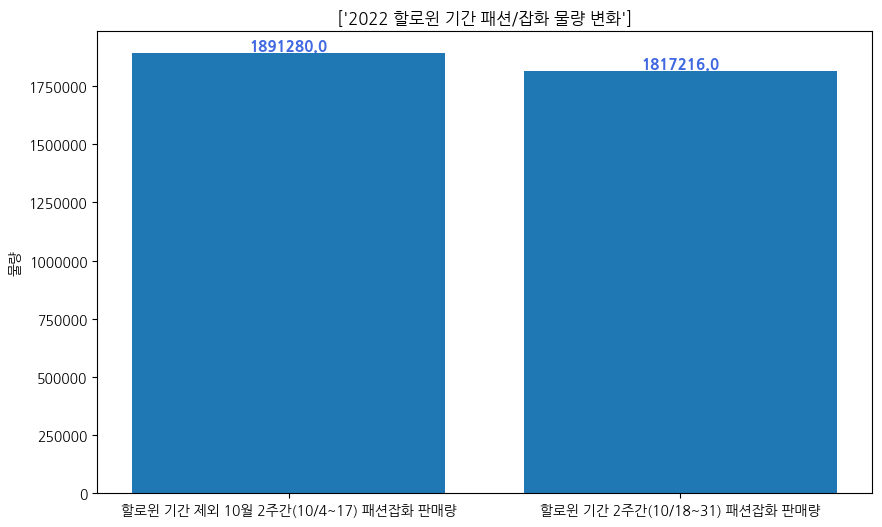

In [38]:
plt.figure(figsize=(10,6))
plt.bar(['할로윈 기간 제외 10월 2주간(10/4~17) 패션잡화 판매량', '할로윈 기간 2주간(10/18~31) 패션잡화 판매량'], [stuff_bf_22, stuff_af_22])
plt.title(['2022 할로윈 기간 패션/잡화 물량 변화'])

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

x = np.arange(2)
year = ['할로윈 기간 이전', '할로윈 기간 이후'] # x축 표시
value = [stuff_bf_22, stuff_af_22]

for i, v in enumerate(x):
    plt.text(v, value[i], value[i],
             fontsize = 11,
             fontweight = 'bold',
             color = 'royalblue',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.ylabel('물량')
plt.show()